In [ ]:
import json
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [ ]:
from google.colab import drive

In [ ]:
from os.path import exists

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
all_df = []
file_index = 1
while (True):
  file_name = "/content/gdrive/MyDrive/TrackFieldData/Roster/divI_team_rosters" +  str(file_index) + ".csv"
  if (exists(file_name) == False):
    break
  print("Reading " + file_name)
  df = pd.read_csv(file_name)
  all_df.append(df)
  file_index += 1

df_all_roster = pd.concat(all_df)



Reading /content/gdrive/MyDrive/TrackFieldData/Roster/divI_team_rosters1.csv
Reading /content/gdrive/MyDrive/TrackFieldData/Roster/divI_team_rosters2.csv
Reading /content/gdrive/MyDrive/TrackFieldData/Roster/divI_team_rosters3.csv
Reading /content/gdrive/MyDrive/TrackFieldData/Roster/divI_team_rosters4.csv
Reading /content/gdrive/MyDrive/TrackFieldData/Roster/divI_team_rosters5.csv
Reading /content/gdrive/MyDrive/TrackFieldData/Roster/divI_team_rosters6.csv
Reading /content/gdrive/MyDrive/TrackFieldData/Roster/divI_team_rosters7.csv
Reading /content/gdrive/MyDrive/TrackFieldData/Roster/divI_team_rosters8.csv
Reading /content/gdrive/MyDrive/TrackFieldData/Roster/divI_team_rosters9.csv
Reading /content/gdrive/MyDrive/TrackFieldData/Roster/divI_team_rosters10.csv
Reading /content/gdrive/MyDrive/TrackFieldData/Roster/divI_team_rosters11.csv
Reading /content/gdrive/MyDrive/TrackFieldData/Roster/divI_team_rosters12.csv
Reading /content/gdrive/MyDrive/TrackFieldData/Roster/divI_team_rosters13

# initial EDA

In [ ]:
df_all_roster

,Unnamed: 0,TeamName,TeamLink,TeamYear,AthleteGender,AthleteName,AthleteGrade,AthleteLink
0,0,Abilene Christian,https://www.tfrrs.org/teams/tf/TX_college_m_Ab...,2023,M,"Baluti, Joseph",\n SO-2\n,/athletes/8011621/Abilene_Christian/Joseph_Bal...
1,1,Abilene Christian,https://www.tfrrs.org/teams/tf/TX_college_m_Ab...,2023,M,"Banks, Rovaughn",\n FR-1\n,/athletes/8351220/Abilene_Christian/Rovaughn_B...
2,2,Abilene Christian,https://www.tfrrs.org/teams/tf/TX_college_m_Ab...,2023,M,"Bornemeier, Ryan",\n RS/Una\n,/athletes/7546196/Abilene_Christian/Ryan_Borne...
3,3,Abilene Christian,https://www.tfrrs.org/teams/tf/TX_college_m_Ab...,2023,M,"Brooks, Horatio",\n FR-1\n,/athletes/8351221/Abilene_Christian/Horatio_Br...
4,4,Abilene Christian,https://www.tfrrs.org/teams/tf/TX_college_m_Ab...,2023,M,"Carter, Aidan",\n RS/Una\n,/athletes/8240844/Abilene_Christian/Aidan_Cart...
...,...,...,...,...,...,...,...,...
1455,1455,Youngstown St.,https://www.tfrrs.org/teams/tf/OH_college_f_Yo...,2017,F,"Mathews, Lakneesha",\n FR-1\n,/athletes/6085163/Youngstown_St/Lakneesha_Math...
1456,1456,Youngstown St.,https://www.tfrrs.org/teams/tf/OH_college_f_Yo...,2017,F,"Muhlenkamp, Jennifer",\n SO-2\n,/athletes/5588767/Youngstown_St/Jennifer_Muhle...
1457,1457,Youngstown St.,https://www.tfrrs.org/teams/tf/OH_college_f_Yo...,2017,F,"Simon, Reshanna",\n FR-1\n,/athletes/6085166/Youngstown_St/Reshanna_Simon...
1458,1458,Youngstown St.,https://www.tfrrs.org/teams/tf/OH_college_f_Yo...,2017,F,"Smyles, Jasmine",\n FR-1\n,/athletes/6085167/Youngstown_St/Jasmine_Smyles...


In [ ]:
# prompt: get the count of unique values of TeamName

df_all_roster['TeamName'].nunique()


358

In [ ]:
df_all_roster['AthleteLink'].nunique()


76140

In [ ]:
len(df_all_roster)

160502

## there are less values for 2020

In [ ]:
# prompt: get  the values of TeamYear

row_counts_by_year = df_all_roster['TeamYear'].value_counts()


In [ ]:
row_counts_by_year

2023    25151
2022    24526
2021    24267
2017    24224
2019    24082
2018    23762
2020    14490
Name: TeamYear, dtype: int64

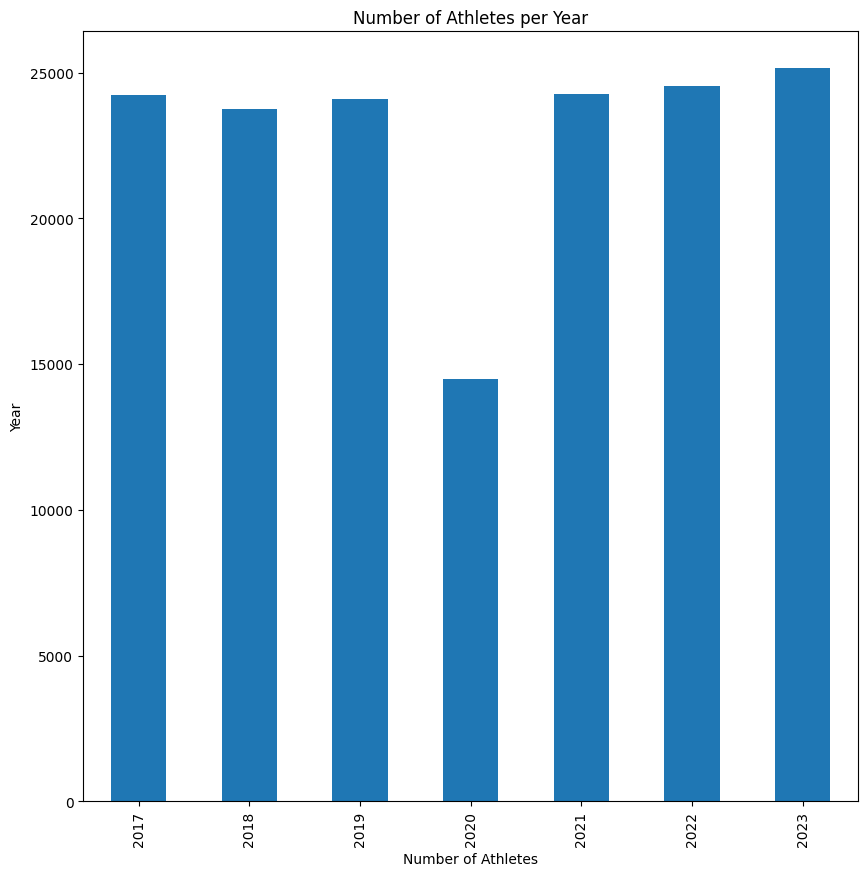

In [ ]:
# prompt: plot row_counts_by_year with vertical bar chart sorted by year

row_counts_by_year.sort_index().plot(kind='bar', figsize=(10, 10))
plt.xlabel('Number of Athletes')
plt.ylabel('Year')
plt.title('Number of Athletes per Year')
plt.show()


In [ ]:
df_all_roster['AthleteGrade'].value_counts()

\n                  FR-1\n                      51613
\n                  SO-2\n                      40415
\n                  JR-3\n                      35257
\n                  SR-4\n                      26900
\n                  RS/Una\n                     6317
Name: AthleteGrade, dtype: int64

In [ ]:
# prompt: replace the \n and spaces in AthleteGrade with empty

df_all_roster['AthleteGrade'] = df_all_roster['AthleteGrade'].str.replace('\\n', '').str.replace(' ', '')


<ipython-input-14-de4f3be45024>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_all_roster['AthleteGrade'] = df_all_roster['AthleteGrade'].str.replace('\\n', '').str.replace(' ', '')


## there are a ot more freshman than seniors

In [ ]:
df_all_roster['AthleteGrade'].value_counts()

FR-1      51613
SO-2      40415
JR-3      35257
SR-4      26900
RS/Una     6317
Name: AthleteGrade, dtype: int64

# analyze both sexes

In [ ]:
df_StudentGradeByYear = pd.DataFrame(df_all_roster.groupby(["TeamYear"])["AthleteGrade"].value_counts(normalize=True))
df_StudentGradeByYear.head()

AthleteGrade
TeamYear AthleteGrade              
2017     FR-1              0.299744
         SO-2              0.248514
         JR-3              0.217099
         SR-4              0.182505
         RS/Una            0.052138

In [ ]:
df_StudentGradeByYear.rename(columns={"AthleteGrade": "Percentage"}, inplace=True)
df_StudentGradeByYear.reset_index(inplace=True)

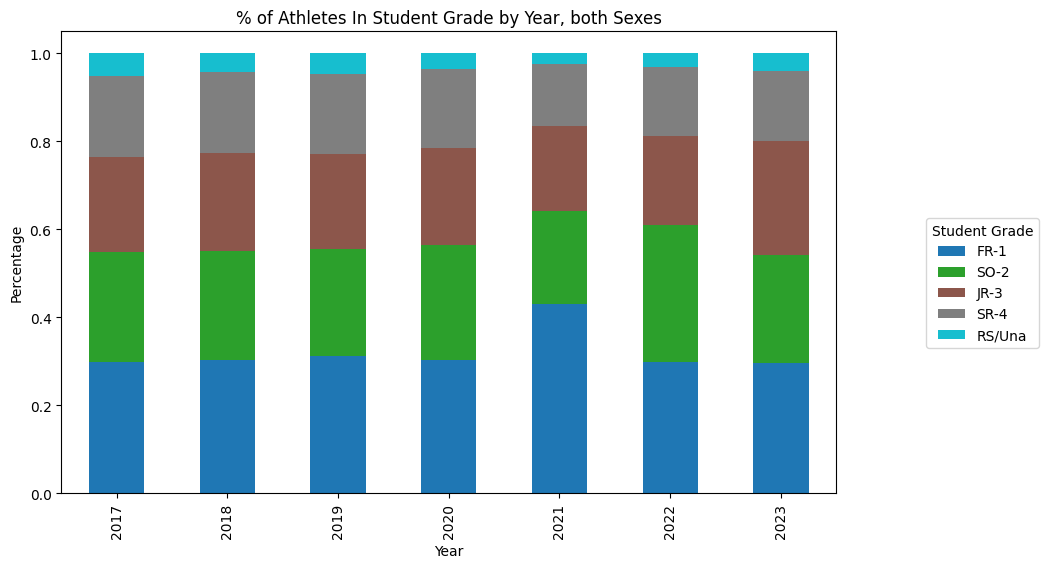

In [ ]:
df_StudentGradeByYear.pivot(index='TeamYear', columns='AthleteGrade', values='Percentage')[["FR-1","SO-2","JR-3","SR-4", "RS/Una"]].plot(kind="bar",
                    stacked=True,
                    colormap='tab10',
                    figsize=(10, 6))
plt.title("% of Athletes In Student Grade by Year, both Sexes")
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.legend(bbox_to_anchor=(1.27,0.3), loc='lower right', title = "Student Grade")
plt.show()

# analyze male only

In [ ]:
df_all_roster_m = df_all_roster[df_all_roster["AthleteGender"] == "M"]

In [ ]:
df_StudentGradeByYear_m = pd.DataFrame(df_all_roster_m.groupby(["TeamYear"])["AthleteGrade"].value_counts(normalize=True))
df_StudentGradeByYear_m.head()

AthleteGrade
TeamYear AthleteGrade              
2017     FR-1              0.292579
         SO-2              0.244705
         JR-3              0.220235
         SR-4              0.182239
         RS/Una            0.060242

In [ ]:
df_StudentGradeByYear_m.rename(columns={"AthleteGrade": "Percentage"}, inplace=True)
df_StudentGradeByYear_m.reset_index(inplace=True)

In [ ]:
df_StudentGradeByYear_m

,TeamYear,AthleteGrade,Percentage
0,2017,FR-1,0.292579
1,2017,SO-2,0.244705
2,2017,JR-3,0.220235
3,2017,SR-4,0.182239
4,2017,RS/Una,0.060242
5,2018,FR-1,0.296225
6,2018,SO-2,0.242574
7,2018,JR-3,0.228681
8,2018,SR-4,0.182890
9,2018,RS/Una,0.049630


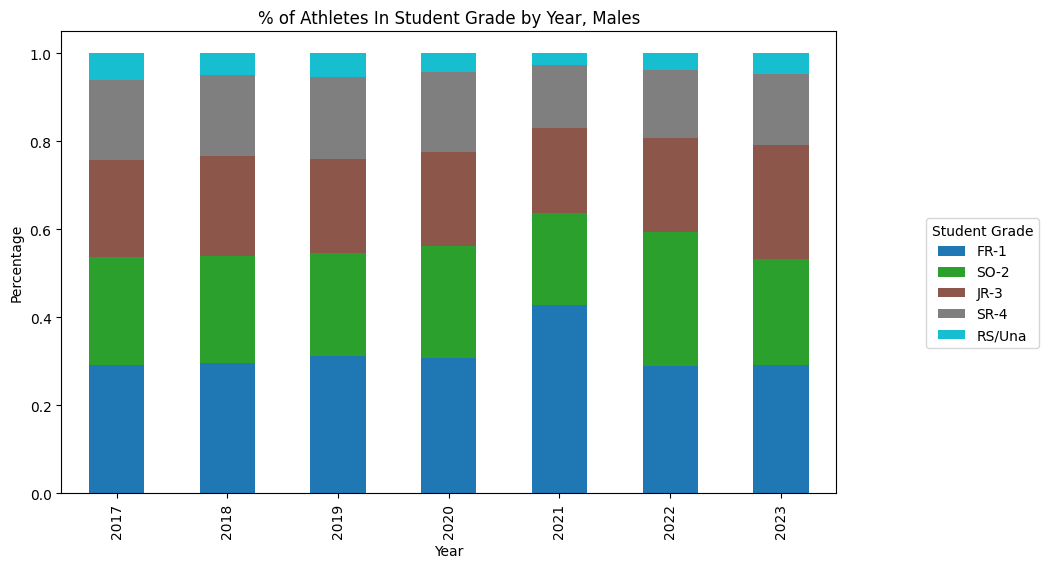

In [ ]:
df_StudentGradeByYear_m.pivot(index='TeamYear', columns='AthleteGrade', values='Percentage')[["FR-1","SO-2","JR-3","SR-4", "RS/Una"]].plot(kind="bar",
                    stacked=True,
                    colormap='tab10',
                    figsize=(10, 6))
plt.title("% of Athletes In Student Grade by Year, Males")
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.legend(bbox_to_anchor=(1.27,0.3), loc='lower right', title = "Student Grade")
plt.show()

# female only

In [ ]:
df_all_roster_f = df_all_roster[df_all_roster["AthleteGender"] == "F"]

In [ ]:
df_all_roster_f = pd.DataFrame(df_all_roster_f.groupby(["TeamYear"])["AthleteGrade"].value_counts(normalize=True))
df_all_roster_f.head()

AthleteGrade
TeamYear AthleteGrade              
2017     FR-1              0.305945
         SO-2              0.251810
         JR-3              0.214385
         SR-4              0.182735
         RS/Una            0.045126

In [ ]:
df_all_roster_f.rename(columns={"AthleteGrade": "Percentage"}, inplace=True)
df_all_roster_f.reset_index(inplace=True)

In [ ]:
df_all_roster_f

,TeamYear,AthleteGrade,Percentage
0,2017,FR-1,0.305945
1,2017,SO-2,0.251810
2,2017,JR-3,0.214385
3,2017,SR-4,0.182735
4,2017,RS/Una,0.045126
5,2018,FR-1,0.308712
6,2018,SO-2,0.250916
7,2018,JR-3,0.221122
8,2018,SR-4,0.182513
9,2018,RS/Una,0.036737


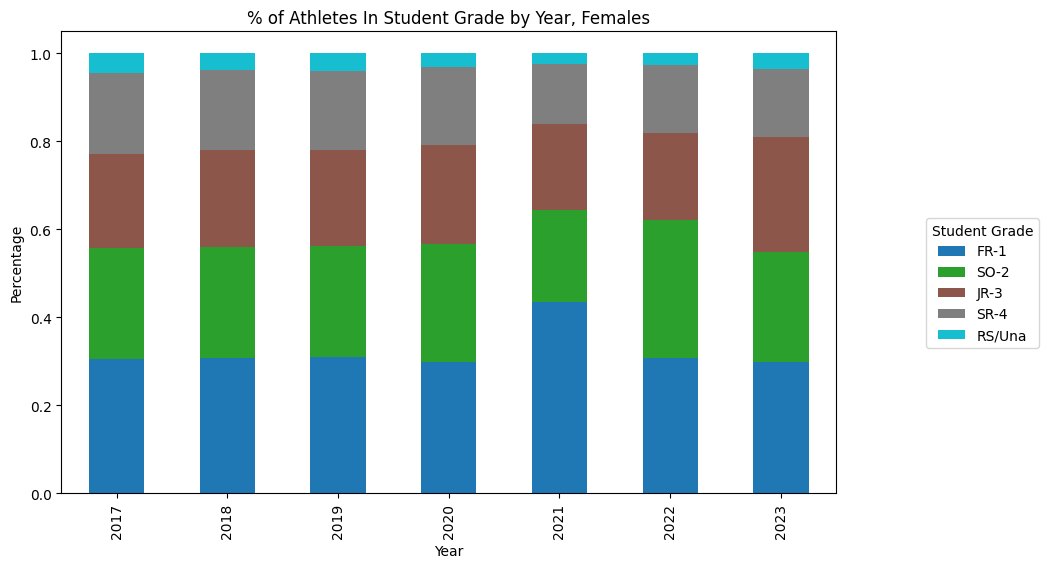

In [ ]:
df_all_roster_f.pivot(index='TeamYear', columns='AthleteGrade', values='Percentage')[["FR-1","SO-2","JR-3","SR-4", "RS/Una"]].plot(kind="bar",
                    stacked=True,
                    colormap='tab10',
                    figsize=(10, 6))
plt.title("% of Athletes In Student Grade by Year, Females")
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.legend(bbox_to_anchor=(1.27,0.3), loc='lower right', title = "Student Grade")
plt.show()

# SMU athletes

In [ ]:
df_all_roster_smu_f = df_all_roster[df_all_roster["TeamName"] == "SMU"]

In [ ]:
len(df_all_roster_smu_f)

179

In [ ]:
df_all_roster_smu_f["AthleteGender"].value_counts()


F    179
Name: AthleteGender, dtype: int64

In [ ]:
df_all_roster_smu_f = pd.DataFrame(df_all_roster_smu_f.groupby(["TeamYear"])["AthleteGrade"].value_counts(normalize=True))

In [ ]:
df_all_roster_smu_f.rename(columns={"AthleteGrade": "Percentage"}, inplace=True)
df_all_roster_smu_f.reset_index(inplace=True)

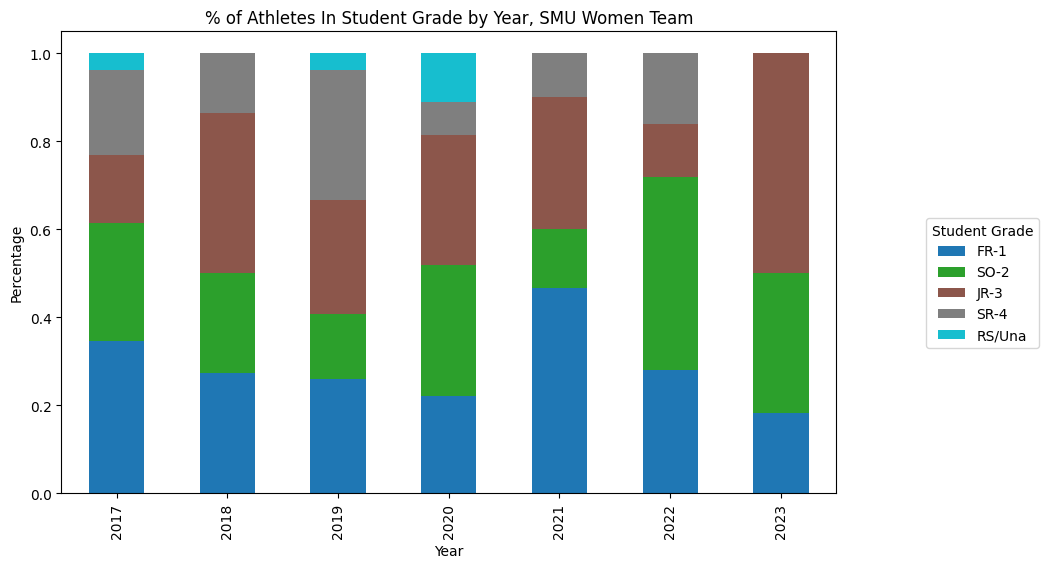

In [ ]:
df_all_roster_smu_f.pivot(index='TeamYear', columns='AthleteGrade', values='Percentage')[["FR-1","SO-2","JR-3","SR-4", "RS/Una"]].plot(kind="bar",
                    stacked=True,
                    colormap='tab10',
                    figsize=(10, 6))
plt.title("% of Athletes In Student Grade by Year, SMU Women Team")
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.legend(bbox_to_anchor=(1.27,0.3), loc='lower right', title = "Student Grade")
plt.show()

# look at new vs returning students (student is on roster in year X and year X+1 for the same team, same grade)

## new players by year

In [ ]:
df_all_roster.head()

,Unnamed: 0,TeamName,TeamLink,TeamYear,AthleteGender,AthleteName,AthleteGrade,AthleteLink
0,0,Abilene Christian,https://www.tfrrs.org/teams/tf/TX_college_m_Ab...,2023,M,"Baluti, Joseph",SO-2,/athletes/8011621/Abilene_Christian/Joseph_Bal...
1,1,Abilene Christian,https://www.tfrrs.org/teams/tf/TX_college_m_Ab...,2023,M,"Banks, Rovaughn",FR-1,/athletes/8351220/Abilene_Christian/Rovaughn_B...
2,2,Abilene Christian,https://www.tfrrs.org/teams/tf/TX_college_m_Ab...,2023,M,"Bornemeier, Ryan",RS/Una,/athletes/7546196/Abilene_Christian/Ryan_Borne...
3,3,Abilene Christian,https://www.tfrrs.org/teams/tf/TX_college_m_Ab...,2023,M,"Brooks, Horatio",FR-1,/athletes/8351221/Abilene_Christian/Horatio_Br...
4,4,Abilene Christian,https://www.tfrrs.org/teams/tf/TX_college_m_Ab...,2023,M,"Carter, Aidan",RS/Una,/athletes/8240844/Abilene_Christian/Aidan_Cart...


In [ ]:
div1_teams = list(set(df_all_roster['TeamName'].tolist()))

team_names_list = []
team_years_list = []
team_new_players_in_year_list = []

for team in div1_teams:
  team_years = list(set(df_all_roster[df_all_roster['TeamName'] == team]['TeamYear'].tolist()))
  team_years.sort(key = int)
  prev_year = -1
  prev_roster = []
  for year in team_years:
    #print(team, year)
    current_roster = df_all_roster.loc[(df_all_roster['TeamName'] == team) & (df_all_roster['TeamYear'] == year)].AthleteLink.tolist()
    #print("Current roster", team, year, current_roster)
    if prev_year != -1 and (prev_year + 1) == year:
      new_players = list(set(current_roster) - set(prev_roster))
      #print(team,year, new_players)
      team_names_list.append(team)
      team_years_list.append(year)
      team_new_players_in_year_list.append(len(new_players))

    prev_year = year
    prev_roster = current_roster

In [ ]:
team_new_players_in_year_df = pd.DataFrame({'Team': team_names_list, 'Year': team_years_list, 'NewPlayers': team_new_players_in_year_list})

In [ ]:
df_mean_new_players_by_year = pd.DataFrame(team_new_players_in_year_df.groupby(['Year']).mean())
df_mean_new_players_by_year = df_mean_new_players_by_year.reset_index()
df_mean_new_players_by_year

<ipython-input-42-9d550dce1fef>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean_new_players_by_year = pd.DataFrame(team_new_players_in_year_df.groupby(['Year']).mean())


,Year,NewPlayers
0,2018,25.075802
1,2019,26.539130
2,2020,20.561069
3,2021,32.660156
4,2022,24.840116
5,2023,26.852273


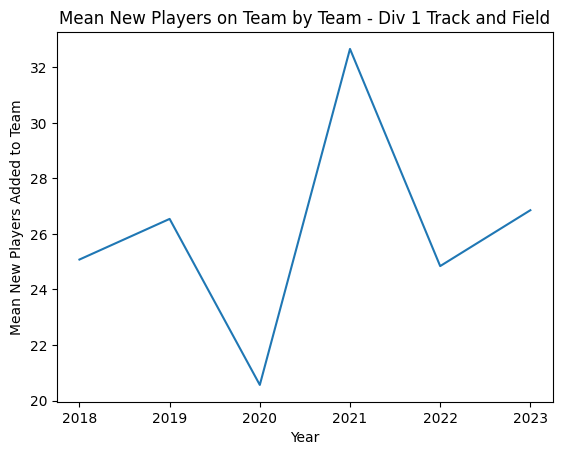

In [ ]:
# prompt: plot the new number of players by year using matplotlib



plt.plot(df_mean_new_players_by_year.Year, df_mean_new_players_by_year.NewPlayers)
plt.xlabel('Year')
plt.ylabel('Mean New Players Added to Team')

plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title("Mean New Players on Team by Team - Div 1 Track and Field")
plt.show()

In [ ]:
df_all_roster.groupby(["TeamYear"]).size().reset_index()

,TeamYear,0
0,2017,24224
1,2018,23762
2,2019,24082
3,2020,14490
4,2021,24267
5,2022,24526
6,2023,25151


In [ ]:

df_all_roster.groupby(["TeamYear"])["TeamName"].nunique()

TeamYear
2017    343
2018    345
2019    347
2020    263
2021    344
2022    352
2023    358
Name: TeamName, dtype: int64

## new players by year, grade

In [ ]:
athlete_grades

['SO-2', 'SR-4', 'RS/Una', 'FR-1', 'JR-3']

In [ ]:
df_all_roster.loc[(df_all_roster['TeamName'] == 'Arkansas') & (df_all_roster['TeamYear'] == 2018) & (df_all_roster['AthleteGrade'] == 'SO-2')]

,Unnamed: 0,TeamName,TeamLink,TeamYear,AthleteGender,AthleteName,AthleteGrade,AthleteLink
5972,5972,Arkansas,https://www.tfrrs.org/teams/tf/AR_college_m_Ar...,2018,M,"Boit, Gilbert",SO-2,/athletes/6881477/Arkansas/Gilbert_Boit.html
5973,5973,Arkansas,https://www.tfrrs.org/teams/tf/AR_college_m_Ar...,2018,M,"Brown, Graham",SO-2,/athletes/5595880/Arkansas/Graham_Brown.html
5974,5974,Arkansas,https://www.tfrrs.org/teams/tf/AR_college_m_Ar...,2018,M,"Brown, Jalen",SO-2,/athletes/6584596/Arkansas/Jalen_Brown.html
5977,5977,Arkansas,https://www.tfrrs.org/teams/tf/AR_college_m_Ar...,2018,M,"Cates, Preston",SO-2,/athletes/6422904/Arkansas/Preston_Cates.html
5979,5979,Arkansas,https://www.tfrrs.org/teams/tf/AR_college_m_Ar...,2018,M,"Chattoo, Shakiel",SO-2,/athletes/6584598/Arkansas/Shakiel_Chattoo.html
6000,6000,Arkansas,https://www.tfrrs.org/teams/tf/AR_college_m_Ar...,2018,M,"Nairn, Laquan",SO-2,/athletes/6584630/Arkansas/Laquan_Nairn.html
6004,6004,Arkansas,https://www.tfrrs.org/teams/tf/AR_college_m_Ar...,2018,M,"Perinchief, Jah-Nhai",SO-2,/athletes/6584631/Arkansas/Jah-Nhai_Perinchief...
6006,6006,Arkansas,https://www.tfrrs.org/teams/tf/AR_college_m_Ar...,2018,M,"Rivera, Brendon",SO-2,/athletes/5595890/Arkansas/Brendon_Rivera.html
6010,6010,Arkansas,https://www.tfrrs.org/teams/tf/AR_college_m_Ar...,2018,M,"Schrage, Harrison",SO-2,/athletes/6138310/Arkansas/Harrison_Schrage.html
6019,6019,Arkansas,https://www.tfrrs.org/teams/tf/AR_college_m_Ar...,2018,M,"Winn, John",SO-2,/athletes/5595891/Arkansas/John_Winn.html


In [ ]:

athlete_grades = list(set(df_all_roster['AthleteGrade'].tolist()))
div1_teams = list(set(df_all_roster['TeamName'].tolist()))

team_names_list = []
team_years_list = []
team_grade_list = []
team_new_players_in_year_list = []


for team in div1_teams:
  team_years = list(set(df_all_roster[df_all_roster['TeamName'] == team]['TeamYear'].tolist()))
  team_years.sort(key = int)
  for athlete_grade in athlete_grades:
    prev_year = -1
    prev_roster = []
    for year in team_years:
      #print(team, year)
      current_roster = df_all_roster.loc[(df_all_roster['TeamName'] == team) & (df_all_roster['TeamYear'] == year) & (df_all_roster['AthleteGrade'] == athlete_grade)].AthleteLink.tolist()
      #print("Current roster", team, year, current_roster)
      if prev_year != -1 and (prev_year + 1) == year:
        new_players = list(set(current_roster) - set(prev_roster))
        #print(team,year, athlete_grade, new_players)
        team_names_list.append(team)
        team_years_list.append(year)
        team_grade_list.append(athlete_grade)
        team_new_players_in_year_list.append(len(new_players))

      prev_year = year
      prev_roster = current_roster

In [ ]:
team_new_players_in_year_by_grade_df = pd.DataFrame({'Team': team_names_list, 'Year': team_years_list, 'Grade':team_grade_list, 'NewPlayers': team_new_players_in_year_list})

In [ ]:
team_new_players_in_year_by_grade_df

,Team,Year,Grade,NewPlayers
0,LIU,2018,SO-2,11
1,LIU,2019,SO-2,6
2,LIU,2022,SO-2,24
3,LIU,2023,SO-2,12
4,LIU,2018,SR-4,7
...,...,...,...,...
9505,ULM,2019,JR-3,12
9506,ULM,2020,JR-3,4
9507,ULM,2021,JR-3,11
9508,ULM,2022,JR-3,8


In [ ]:
 pd.DataFrame(team_new_players_in_year_by_grade_df.groupby(['Year']).mean())

<ipython-input-80-4499e2f8a9f4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pd.DataFrame(team_new_players_in_year_by_grade_df.groupby(['Year']).mean())


,NewPlayers
Year,
2018,13.054810
2019,13.183768
2020,10.374046
2021,9.517969
2022,12.541860
2023,12.957386


In [ ]:
pd.DataFrame(team_new_players_in_year_by_grade_df.groupby(['Year', 'Grade']).agg({'NewPlayers':['mean']}))

NewPlayers
                  mean
Year Grade            
2018 FR-1    19.813411
     JR-3    14.428571
     RS/Una   2.807580
     SO-2    16.224490
     SR-4    12.000000
2019 FR-1    20.652174
     JR-3    14.107246
     RS/Una   3.136232
     SO-2    16.092754
     SR-4    11.930435
2020 FR-1    15.805344
     JR-3    11.156489
     RS/Una   1.854962
     SO-2    13.694656
     SR-4     9.358779
2021 FR-1    21.765625
     JR-3     8.718750
     RS/Una   1.765625
     SO-2     8.531250
     SR-4     6.808594
2022 FR-1    18.084302
     JR-3    12.622093
     RS/Una   2.095930
     SO-2    20.351744
     SR-4     9.555233
2023 FR-1    19.707386
     JR-3    16.778409
     RS/Una   2.775568
     SO-2    15.661932
     SR-4     9.863636

In [ ]:
df_mean_new_players_by_grade_by_year = pd.DataFrame(team_new_players_in_year_by_grade_df.groupby(['Year', 'Grade']).agg({'Grade':['mean']}))
df_mean_new_players_by_grade_by_year.columns = ['mean']
df_mean_new_players_by_grade_by_year = df_mean_new_players_by_grade_by_year.reset_index()
df_mean_new_players_by_grade_by_year

,index,Year,NewPlayers
0,0,2018,25.075802
1,1,2019,26.539130
2,2,2020,20.561069
3,3,2021,32.660156
4,4,2022,24.840116
5,5,2023,26.852273


## returning players by year

In [ ]:
div1_teams = list(set(df_all_roster['TeamName'].tolist()))

team_names_list = []
team_years_list = []
team_return_players_in_year_list = []

for team in div1_teams:
  team_years = list(set(df_all_roster[df_all_roster['TeamName'] == team]['TeamYear'].tolist()))
  team_years.sort(key = int)
  prev_year = -1
  prev_roster = []
  for year in team_years:
    #print(team, year)
    current_roster = df_all_roster.loc[(df_all_roster['TeamName'] == team) & (df_all_roster['TeamYear'] == year)].AthleteLink.tolist()
    #print("Current roster", team, year, current_roster)
    if prev_year != -1 and (prev_year + 1) == year:
      returning_players = list(set(current_roster).intersection(set(prev_roster)))
      #print(team,year, new_players)
      team_names_list.append(team)
      team_years_list.append(year)
      team_return_players_in_year_list.append(len(returning_players))

    prev_year = year
    prev_roster = current_roster

In [ ]:
team_return_players_in_year_df = pd.DataFrame({'Team': team_names_list, 'Year': team_years_list, 'ReturnPlayers': team_return_players_in_year_list})

In [ ]:
df_mean_return_players_by_year = pd.DataFrame(team_return_players_in_year_df.groupby(['Year']).mean())
df_mean_return_players_by_year = df_mean_return_players_by_year.reset_index()
df_mean_return_players_by_year

<ipython-input-106-2812324cfaee>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean_return_players_by_year = pd.DataFrame(team_return_players_in_year_df.groupby(['Year']).mean())


,Year,ReturnPlayers
0,2018,44.116618
1,2019,43.130435
2,2020,34.335878
3,2021,37.789062
4,2022,44.941860
5,2023,43.534091


## returning players by year, grade

In [ ]:
athlete_grades = list(set(df_all_roster['AthleteGrade'].tolist()))
div1_teams = list(set(df_all_roster['TeamName'].tolist()))

team_names_list = []
team_years_list = []
team_grade_list = []
team_return_players_in_year_list = []


for team in div1_teams:
  team_years = list(set(df_all_roster[df_all_roster['TeamName'] == team]['TeamYear'].tolist()))
  team_years.sort(key = int)
  for athlete_grade in athlete_grades:
    prev_year = -1
    prev_roster = []
    for year in team_years:
      #print(team, year)
      current_roster = df_all_roster.loc[(df_all_roster['TeamName'] == team) & (df_all_roster['TeamYear'] == year) & (df_all_roster['AthleteGrade'] == athlete_grade)].AthleteLink.tolist()
      #print("Current roster", team, year, current_roster)
      if prev_year != -1 and (prev_year + 1) == year:
        return_players = list(set(current_roster).intersection(set(prev_roster)))
        #print(team,year, athlete_grade, new_players)
        team_names_list.append(team)
        team_years_list.append(year)
        team_grade_list.append(athlete_grade)
        team_return_players_in_year_list.append(len(return_players))

      prev_year = year
      prev_roster = current_roster

KeyboardInterrupt: ignored

In [ ]:
team_return_players_in_year_by_grade_df = pd.DataFrame({'Team': team_names_list, 'Year': team_years_list, 'ReturnPlayers': team_return_players_in_year_list})

In [ ]:
team_return_players_in_year_by_grade_df = pd.DataFrame({'Team': team_names_list, 'Year': team_years_list, 'Grade':team_grade_list, 'ReturnPlayers': team_return_players_in_year_list})

In [ ]:
team_return_players_in_year_by_grade_df

,Team,Year,Grade,ReturnPlayers
0,LIU,2018,SO-2,0
1,LIU,2019,SO-2,1
2,LIU,2022,SO-2,0
3,LIU,2023,SO-2,6
4,LIU,2018,SR-4,1
...,...,...,...,...
9505,ULM,2019,JR-3,1
9506,ULM,2020,JR-3,0
9507,ULM,2021,JR-3,2
9508,ULM,2022,JR-3,5


In [ ]:
df_mean_return_players_by_year_by_grade = pd.DataFrame(team_return_players_in_year_by_grade_df.groupby(['Year']).mean())
df_mean_return_players_by_year_by_grade = df_mean_return_players_by_year_by_grade.reset_index()
df_mean_return_players_by_year_by_grade

<ipython-input-92-4599241f4d82>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean_return_players_by_year_by_grade = pd.DataFrame(team_return_players_in_year_by_grade_df.groupby(['Year']).mean())


,Year,ReturnPlayers
0,2018,0.783673
1,2019,0.750145
2,2020,0.605344
3,2021,4.571875
4,2022,1.414535
5,2023,1.119886


In [ ]:
pd.DataFrame(team_return_players_in_year_by_grade_df.groupby(['Year', 'Grade']).agg({'ReturnPlayers':['mean']}))

ReturnPlayers
                     mean
Year Grade               
2018 FR-1        1.154519
     JR-3        1.104956
     RS/Una      0.148688
     SO-2        0.877551
     SR-4        0.632653
2019 FR-1        1.026087
     JR-3        1.017391
     RS/Una      0.107246
     SO-2        0.872464
     SR-4        0.727536
2020 FR-1        0.801527
     JR-3        0.900763
     RS/Una      0.137405
     SO-2        0.675573
     SR-4        0.511450
2021 FR-1        9.031250
     JR-3        4.917969
     RS/Una      0.117188
     SO-2        5.976562
     SR-4        2.816406
2022 FR-1        2.552326
     JR-3        1.665698
     RS/Una      0.063953
     SO-2        1.406977
     SR-4        1.383721
2023 FR-1        1.088068
     JR-3        1.582386
     RS/Una      0.113636
     SO-2        1.610795
     SR-4        1.204545